 В ряд стоят N детей, каждому из которых присвоен рейтинг. Вы должны раздать им конфеты, так, чтобы каждому ребёнку досталось хотя бы по одной, и чтобы ребёнок с более высоким рейтингом, чем его сосед, получил больше конфет, чем этот сосед.   
Опишите эффективный алгоритм, определяющий минимальное число конфет, которое вам понадобится (ответом может быть код, псевдокод или русский язык).

In [1]:
import random as rnd
from matplotlib import pyplot as plt

Генерируем данные либо с повтором рейтинга или с уникальными рейтингами

In [7]:
#бесповторная генерация
N = 10
rate_to_num_list = list(range(1, N + 1))
rnd.shuffle(rate_to_num_list)
rate_to_num = {}
for i in range(N):
    rate_to_num[i] = [rate_to_num_list[i]] if i not in rate_to_num else rate_to_num[i].append(rate_to_num_list[i])

print('Rate - > Nums')
print(rate_to_num)  # rate_to_num[rate] = childNumber

Rate - > Nums
{0: [2], 1: [5], 2: [3], 3: [1], 4: [10], 5: [9], 6: [8], 7: [4], 8: [6], 9: [7]}


In [8]:
# # повторная генерация
# N = 6
# rate_to_num = {1: [2], 2: [3, 4, 5], 3: [1, 6]}

За время О(n) создаем обратное отображение num_to_rate.  
Если нам изначально дано отображение num_to_rate, то получить rate_to_num тоже можно за O(n)

In [9]:
#Если нам на вход дан [(child1, rate1), ... , (childN, rateN)], то можно создать отображение rate_to_num за O(N)
num_to_rate = {}
# 0 & N+1 indexes is bounds 
num_to_rate[0] = -1
num_to_rate[N+1] = -1
for rate, numList in rate_to_num.items():
    for num in numList:
        num_to_rate[num] = rate
print('Num -> Rate')
print(num_to_rate)

Num -> Rate
{0: -1, 11: -1, 2: 0, 5: 1, 3: 2, 1: 3, 10: 4, 9: 5, 8: 6, 4: 7, 6: 8, 7: 9}


Изначально у всех 0 конфет  
Алгоритм раздает конфеты сначала людям с маленьким рейтингом, потом большим  
Алгоритм учитывает соседей по обе стороны  
Так как идем от меньшего рейтинга к большему, то соседа с большим рейтингом, чем у текущего будет 0 конфет,  
и поэтому текущему номеру присваиваем максиальное кол-во конфет у соседа + 1  
Если есть повторные рейтинги, то вводим дополнительную проверку на случай если сосед имеет такой же рейтинг

In [10]:
# 0 & N+1 indexes are bounds 
num_to_sweets = {}
for i in range(0, N+2):
    num_to_sweets[i] = 0
sum_sweets = 0
for rate, numList in rate_to_num.items():
    for num in numList:
        min_rate = min(num_to_rate[num-1], num_to_rate[num+1])
        if num_to_rate[num-1] == min_rate and min_rate == rate:
            num_to_sweets[num] = max(num_to_sweets[num-1], num_to_sweets[num+1])
        else:
            num_to_sweets[num] = max(num_to_sweets[num-1], num_to_sweets[num+1]) + 1
        sum_sweets += num_to_sweets[num]
print(num_to_sweets)
print('Answer (total sweets): ' + str(sum_sweets))

{0: 0, 1: 2, 2: 1, 3: 2, 4: 3, 5: 1, 6: 2, 7: 4, 8: 3, 9: 2, 10: 1, 11: 0}
Answer (total sweets): 21


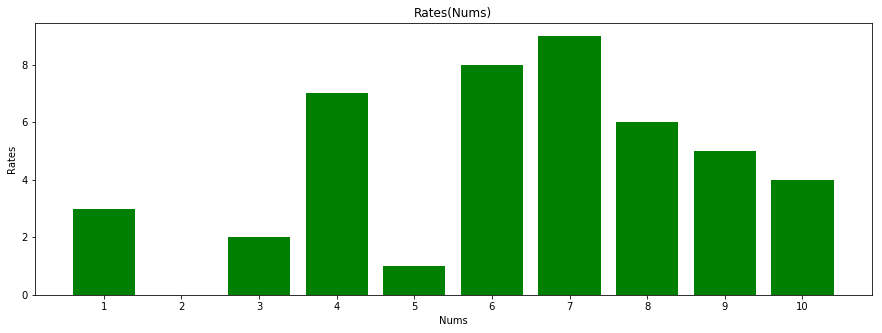

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3, 0, 2, 7, 1, 8, 9, 6, 5, 4]


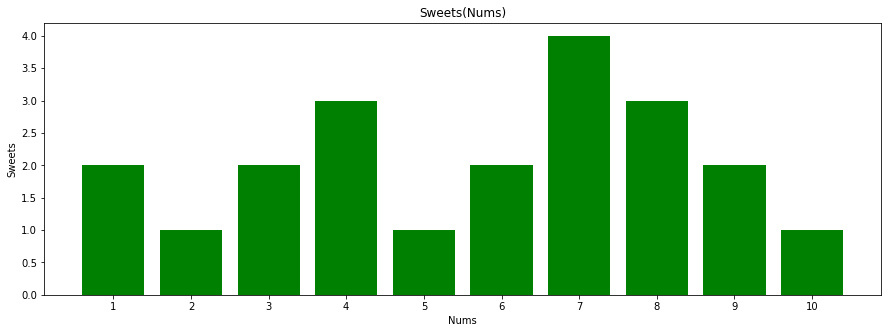

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 1, 2, 3, 1, 2, 4, 3, 2, 1]


In [11]:
nums = list(range(0, N+1))
rates = [None] * (N+1)
sweets = [None] * (N+1)
for i in range(1, N+1):
    rates[i] = num_to_rate[i]
    sweets[i] = num_to_sweets[i]

plt.figure(figsize=(15, 5))
plt.bar(nums[1:], rates[1:], color = 'green')
plt.title("Rates(Nums)")
plt.xlabel("Nums")
plt.ylabel('Rates')
plt.xticks(nums[1:])
plt.show()
print(nums[1:])
print(rates[1:])

plt.figure(figsize=(15, 5))
plt.bar(nums[1:], sweets[1:], color = 'green')
plt.title("Sweets(Nums)")
plt.xlabel("Nums")
plt.ylabel('Sweets')
plt.xticks(nums[1:])
plt.show()
print(nums[1:])
print(sweets[1:])